# Importação de bibliotecas

In [17]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from classifiers.naive_bayes_classifier import NaiveBayesClassifier
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [18]:
np.random.seed(42)
CLASSIFIER_NAME = "Naive Bayes"
TARGET_COLUMN_NAME = "class"
DATASET_NAME = "Coluna"
ACTIVITY_NUMBER = 3
TEST_SIZE = 0.2
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Baixando dataset Coluna

In [19]:
vertebral_column = fetch_ucirepo(id=212)

X_coluna = vertebral_column.data.features
y_coluna = vertebral_column.data.targets

coluna_df = pd.concat([X_coluna, y_coluna], axis="columns")

In [20]:
list(coluna_df[TARGET_COLUMN_NAME].unique())

['Hernia', 'Spondylolisthesis', 'Normal']

# Redefinindo classes para valores numéricos

In [21]:
class_mapping = {"Hernia": 0, "Spondylolisthesis": 1, "Normal": 2}
coluna_df[TARGET_COLUMN_NAME] = coluna_df[TARGET_COLUMN_NAME].map(class_mapping)
coluna_df[TARGET_COLUMN_NAME]

0      0
1      0
2      0
3      0
4      0
      ..
305    2
306    2
307    2
308    2
309    2
Name: class, Length: 310, dtype: int64

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Naive Bayes

In [22]:
naive_bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=coluna_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

naive_bayesian_accuracy_list = []

for train_indexes, test_indexes in naive_bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=coluna_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = NaiveBayesClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    naive_bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

naive_bayesian_df_results = pd.DataFrame(
    naive_bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

naive_bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,0.870968,0.129032,"[289, 9, 57, 60, 25, 63, 92, 184, 244, 46, 75, 163, 296, 307, 285, 290, 5, 155, 164, 168, 73, 104, 137, 206, 76, 173, 113, 33, 275, 251, 108, 3, 82, 259, 93, 101, 45, 17, 197, 119, 42, 24, 179, 242, 298, 196, 226, 7, 287, 77, 114, 239, 145, 84, 181, 230, 302, 198, 195, 210, 224, 158, 126, 109, 247, 234, 202, 78, 147, 59, 118, 6, 182, 30, 22, 262, 56, 148, 140, 208, 278, 203, 144, 167, 90, 223, 66, 116, 172, 250, 19, 146, 79, 299, 288, 72, 15, 10, 274, 238, ...]","[1, 130, 257, 134, 263, 264, 13, 14, 270, 271, 273, 20, 21, 149, 151, 276, 282, 160, 161, 34, 293, 166, 169, 297, 43, 174, 47, 48, 49, 50, 304, 52, 53, 54, 308, 309, 58, 187, 188, 189, 190, 191, 71, 201, 205, 80, 214, 87, 88, 217, 91, 94, 99, 227, 102, 105, 106, 235, 241, 243, 121, 252]","[0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2]","[[12, 0, 3], [0, 26, 1], [4, 0, 16]]"
1,0.854839,0.145161,"[242, 244, 216, 213, 44, 236, 164, 77, 40, 145, 267, 31, 55, 90, 202, 76, 2, 253, 188, 306, 131, 148, 49, 106, 230, 110, 158, 243, 71, 258, 163, 263, 256, 287, 132, 134, 96, 87, 275, 26, 130, 39, 86, 207, 37, 209, 262, 201, 78, 112, 176, 284, 10, 261, 120, 174, 135, 233, 211, 30, 13, 65, 193, 41, 274, 264, 56, 197, 138, 237, 155, 24, 82, 159, 215, 221, 27, 70, 8, 183, 295, 60, 97, 122, 210, 58, 165, 247, 271, 257, 288, 304, 29, 192, 101, 302, 228, 277, 296, 273, ...]","[3, 255, 5, 12, 141, 142, 16, 17, 146, 19, 272, 149, 150, 279, 152, 25, 154, 280, 283, 157, 160, 34, 35, 36, 38, 169, 298, 171, 172, 45, 173, 175, 48, 305, 50, 180, 53, 57, 185, 187, 189, 62, 190, 191, 85, 214, 91, 219, 94, 222, 98, 103, 232, 113, 115, 252, 245, 246, 251, 124, 126, 127]","[1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1]","[[12, 1, 3], [0, 31, 0], [3, 2, 10]]"
2,0.854839,0.145161,"[173, 70, 245, 249, 288, 167, 277, 280, 106, 99, 124, 197, 100, 15, 303, 151, 224, 30, 149, 306, 210, 308, 168, 294, 59, 198, 8, 76, 23, 220, 240, 230, 61, 261, 174, 119, 244, 248, 269, 284, 123, 209, 293, 36, 96, 274, 127, 67, 39, 134, 182, 178, 120, 140, 139, 297, 75, 107, 270, 175, 256, 205, 66, 292, 12, 225, 307, 305, 290, 215, 268, 87, 63, 14, 169, 17, 214, 186, 6, 88, 234, 86, 156, 1, 231, 272, 289, 171, 217, 275, 199, 162, 309, 138, 35, 115, 157, 129, 47, 237, ...]","[0, 258, 4, 133, 7, 135, 9, 11, 13, 142, 143, 144, 271, 146, 19, 148, 281, 27, 155, 29, 159, 34, 163, 295, 40, 43, 172, 45, 46, 304, 177, 53, 55, 57, 185, 190, 191, 196, 200, 202, 79, 81, 211, 212, 89, 219, 223, 226, 227, 228, 232, 108, 239, 241, 116, 118, 247, 121, 250, 251, 252, 255]","[0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1]","[[14, 0, 3], [0, 24, 1], [3, 2, 15]]"
3,0.838710,0.161290,"[5, 200, 8, 11, 47, 153, 198, 159, 267, 194, 181, 298, 128, 113, 120, 97, 101, 233, 78, 72, 180, 76, 20, 104, 214, 95, 254, 229, 146, 219, 279, 257, 43, 49, 293, 115, 230, 161, 196, 265, 203, 189, 111, 151, 185, 64, 63, 234, 125, 118, 102, 173, 201, 209, 247, 296, 57, 306, 255, 2, 245, 289, 79, 7, 157, 3, 92, 187, 127, 268, 190, 259, 17, 18, 148, 15, 98, 44, 248, 169, 29, 31, 281, 82, 55, 174, 86, 287, 168, 162, 207, 60, 155, 188, 213, 304, 143, 284, 80, 303, ...]","[0, 129, 258, 131, 4, 132, 260, 262, 136, 9, 137, 138, 12, 13, 139, 141, 142, 264, 266, 19, 272, 274, 22, 152, 160, 34, 164, 37, 165, 167, 292, 41, 297, 171, 300, 46, 177, 178, 305, 59, 61, 62, 68, 75, 77, 83, 211, 212, 88, 89, 93, 94, 96, 224, 100, 228, 103, 235, 236, 112, 117, 124]","[0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 

# Vetor de acurácias

In [23]:
bayesian_accuracy_vector = pd.Series(naive_bayesian_df_results["accuracy"])

In [24]:
bayesian_accuracy_vector

0      0.870968
1      0.854839
2      0.854839
3      0.838710
4      0.838710
         ...   
195    0.790323
196    0.854839
197    0.822581
198    0.854839
199    0.790323
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [25]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Naive Bayes

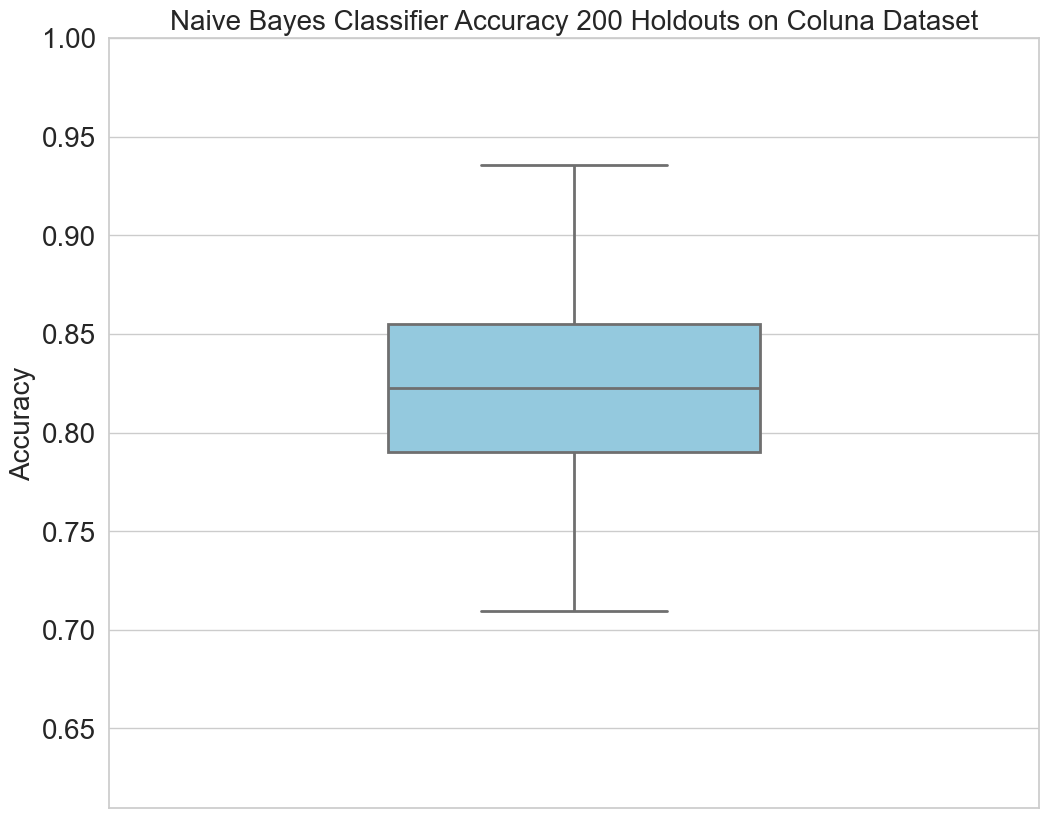

In [26]:
image_type = "boxplot"

image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [27]:
max_accuracy = naive_bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = naive_bayesian_df_results[
    naive_bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = naive_bayesian_df_results.loc[
    index_selected, "train_indexes"
]
best_accuracy_test_indexes = naive_bayesian_df_results.loc[
    index_selected, "test_indexes"
]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=coluna_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [135]
Índice selecionado aleatoriamente: 135
Acurácia do índice selecionado: 93.55%


# Resgatando a matriz de confusão e plotando ela

In [28]:
confusion_matrix_result = naive_bayesian_df_results.loc[
    index_selected, "confusion_matrix"
]

In [29]:
confusion_matrix_result

array([[ 8,  1,  1],
       [ 0, 34,  0],
       [ 2,  0, 16]])

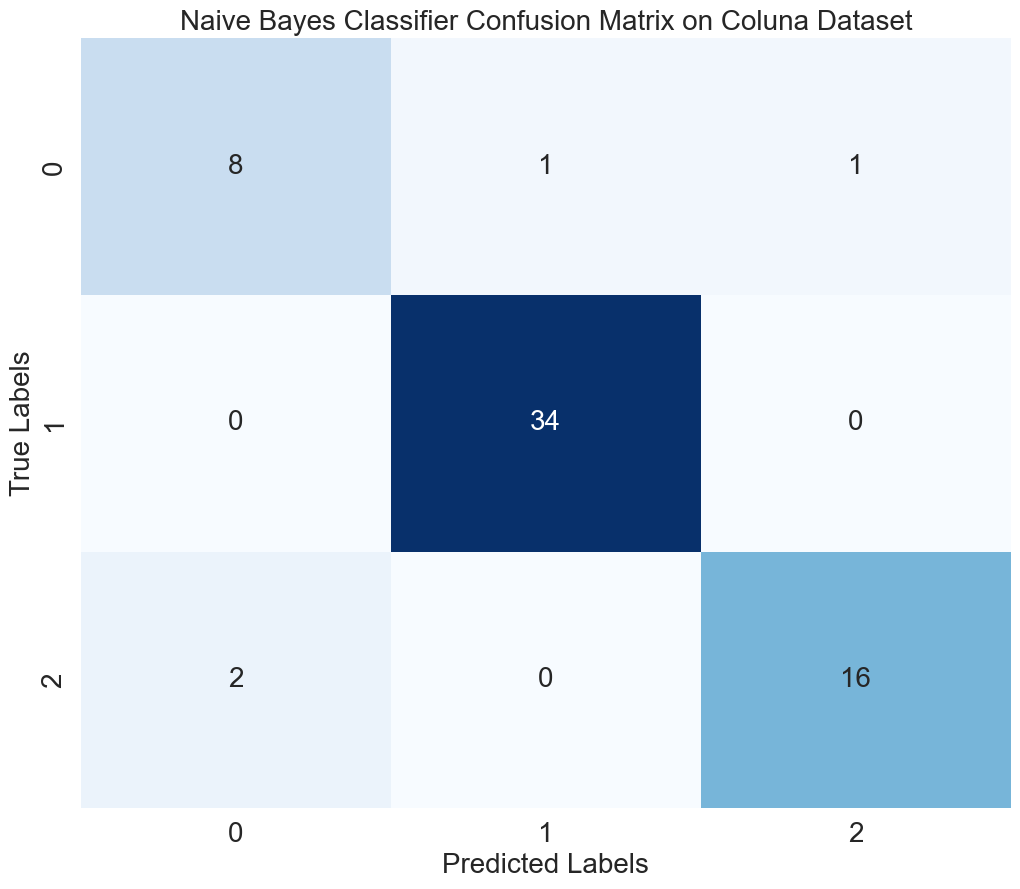

In [30]:
image_type = "confusion_matrix"

image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Naive Bayes baseado em duas features

In [31]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = NaiveBayesClassifier()
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Naive Bayes

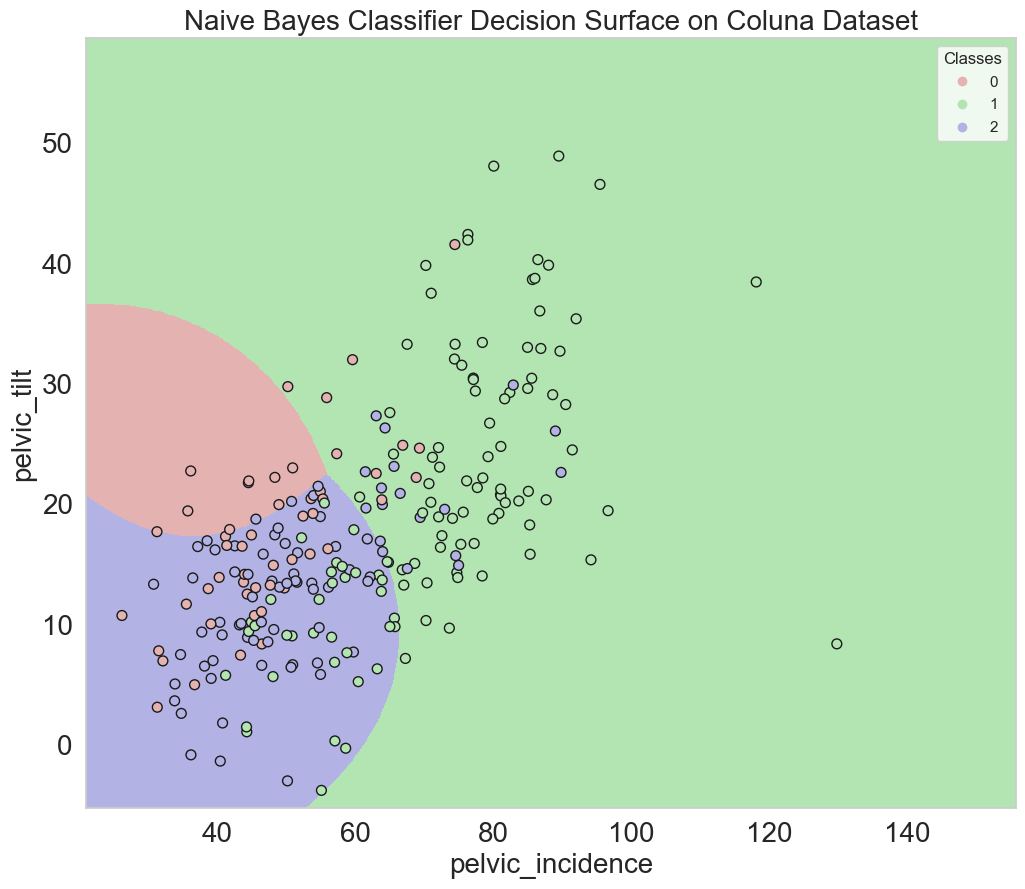

In [32]:
image_type = "decision_surface"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
        num_classes=len(np.unique(y_train)),
    show=True,
)